In [1]:
! pip install kaggle

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
!ls ./gdrive/My\ Drive/Colab\ Notebooks/train

meme  not_meme


In [7]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from tqdm import tqdm
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

In [9]:
!ls gdrive/My\ Drive/Colab\ Notebooks/train

meme  not_meme


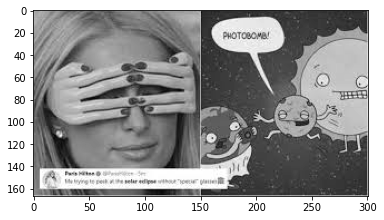

In [10]:
DATADIR = "gdrive/My Drive/Colab Notebooks/train"

CATEGORIES = ["meme", "not_meme"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray') 
        plt.show() 

        break  
    break 

In [12]:
print(img_array,img_array.shape)

[[232 204 203 ... 145 138 191]
 [199 167 164 ...  40  41 135]
 [205 169 163 ...  67  50 158]
 ...
 [193 137 136 ...  53  42 157]
 [175 125 133 ...  42  47 143]
 [227 180 189 ... 146 146 195]] (167, 301)


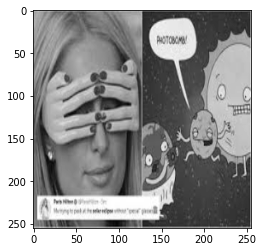

In [14]:
IMG_SIZE = 255

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [15]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num]) 
            except Exception as e: 
                pass

In [17]:
create_training_data()
training_data

100%|██████████| 640/640 [02:05<00:00,  5.08it/s]


[[array([[229, 204, 201, ..., 146, 140, 186],
         [213, 185, 182, ...,  96,  92, 157],
         [197, 166, 163, ...,  48,  42, 129],
         ...,
         [173, 128, 133, ...,  43,  45, 136],
         [197, 156, 161, ...,  97,  98, 163],
         [223, 182, 188, ..., 149, 146, 190]], dtype=uint8), 0],
 [array([[37, 37, 37, ..., 38, 39, 39],
         [37, 37, 37, ..., 38, 39, 39],
         [37, 37, 37, ..., 38, 39, 39],
         ...,
         [37, 37, 37, ..., 38, 39, 39],
         [37, 37, 37, ..., 38, 39, 39],
         [37, 37, 37, ..., 38, 39, 39]], dtype=uint8), 0],
 [array([[242, 246, 251, ..., 254, 254, 254],
         [240, 244, 250, ..., 254, 254, 254],
         [238, 242, 247, ..., 254, 254, 254],
         ...,
         [ 39,  39,  39, ...,  40,  41,  41],
         [ 38,  38,  38, ...,  38,  38,  38],
         [ 38,  38,  38, ...,  38,  38,  38]], dtype=uint8), 0],
 [array([[ 54,  54,  54, ...,  54,  54,  54],
         [ 54,  54,  54, ...,  54,  54,  54],
         [ 54,  5

In [21]:
import random

random.shuffle(training_data)

In [22]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[30]
   [30]
   [30]
   ...
   [27]
   [27]
   [27]]

  [[30]
   [30]
   [30]
   ...
   [27]
   [27]
   [27]]

  [[31]
   [31]
   [31]
   ...
   [27]
   [27]
   [27]]

  ...

  [[20]
   [22]
   [29]
   ...
   [39]
   [39]
   [38]]

  [[21]
   [22]
   [28]
   ...
   [39]
   [38]
   [38]]

  [[19]
   [23]
   [32]
   ...
   [38]
   [38]
   [38]]]]


In [26]:
y[10:20]

[0, 1, 1, 0, 0, 1, 0, 0, 0, 1]

In [27]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

In [215]:
# Model Creation
model = Sequential()
model.add(Conv2D(256, kernel_size=(5, 5), strides=(2,2), input_shape=(IMG_SIZE, IMG_SIZE,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Conv2D(256, kernel_size=(5, 5), strides=(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.5))
model.add(Flatten())
# model.add(Dropout(0.5))
model.add(Dense(64))
# model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [216]:
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 126, 126, 256)     6656      
_________________________________________________________________
activation_48 (Activation)   (None, 126, 126, 256)     0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 31, 31, 256)       0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 256)       1638656   
_________________________________________________________________
activation_49 (Activation)   (None, 14, 14, 256)       0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 3, 3, 256)       

In [217]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [218]:
y=np.array(y)

In [219]:
history = model.fit(X, y, batch_size=10, epochs=3, validation_split=0.4)

Epoch 1/3
76/76 [==============================] - 3s 42ms/step - loss: 0.6546 - accuracy: 0.6311 - val_loss: 0.6171 - val_accuracy: 0.6785
Epoch 2/3
76/76 [==============================] - 3s 40ms/step - loss: 0.5490 - accuracy: 0.7352 - val_loss: 0.5106 - val_accuracy: 0.7396
Epoch 3/3
76/76 [==============================] - 3s 40ms/step - loss: 0.4675 - accuracy: 0.7694 - val_loss: 0.5005 - val_accuracy: 0.7554


Text(0.5, 0, 'Epoch')

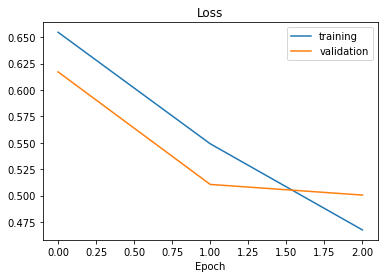

In [220]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [231]:
model.save('Meme_model.h5', save_format="tf")

In [232]:
from google.colab import files
files.download('Meme_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [222]:
def prepare(filepath):
    IMG_SIZE = 255 
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1) 

In [223]:
model = tf.keras.models.load_model("meme.model")

In [227]:
img_path = "gdrive/My Drive/Colab Notebooks/train/meme/00000170.jpg"

In [228]:
prediction = model.predict([prepare(img_path)])

In [229]:
print(CATEGORIES[int(prediction[0][0])])

meme
